In [1]:
# For reading .csv files
import pandas as pd

In [3]:
# For scaling and clustering
import numpy as np

In [5]:
#For visualizing plots
import matplotlib.pyplot as plt

In [7]:
#For adding color-coded cluster visuals
import seaborn as sns

In [9]:
#For importing KMeans
from sklearn.cluster import KMeans

In [11]:
#For scaling
from sklearn.preprocessing import StandardScaler

In [13]:
#For reducing multidimentional data into 2D
from sklearn.decomposition import PCA

In [15]:
# Loading the CSVs
ratings = pd.read_csv("C:/Users/HC/ratings.csv")   # Contains userId, movieId, rating, timestamp
movies = pd.read_csv("C:/Users/HC/movies.csv")     # Contains movieId, title, genres

In [17]:
#Feature Engineering:
# Computing average rating and number of ratings per movie
agg_ratings = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
agg_ratings.columns = ['movieId', 'avg_rating', 'num_ratings']

In [19]:
#Processig genres: one-hot encode genres
genres_expanded = movies['genres'].str.get_dummies(sep='|')
movies = pd.concat([movies[['movieId', 'title']], genres_expanded], axis=1)

In [21]:
#Merging ratings and genres
movie_features = pd.merge(agg_ratings, movies, on='movieId')

In [23]:
#Scaling
X = movie_features.drop(['movieId', 'title'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

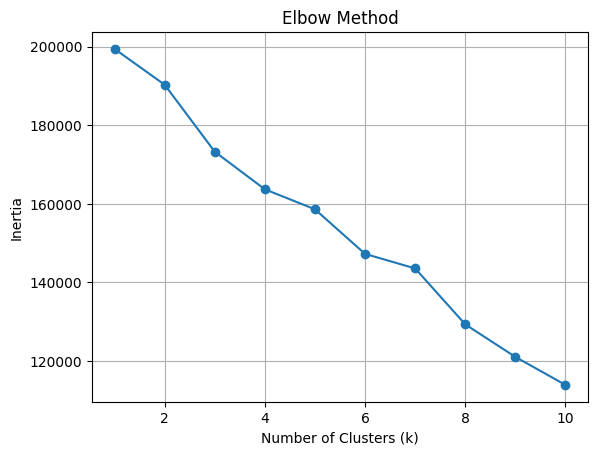

In [25]:
#Clustering with Elbow Method
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
#Plotting the clusters
plt.plot(range(1, 11), inertia, marker='o') 
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [27]:
#Fitting KMeans (I assumed that k=6)
kmeans = KMeans(n_clusters=6, random_state=42)
movie_features['Cluster'] = kmeans.fit_predict(X_scaled)

In [29]:
#PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
movie_features['PCA1'] = pca_components[:, 0]
movie_features['PCA2'] = pca_components[:, 1]

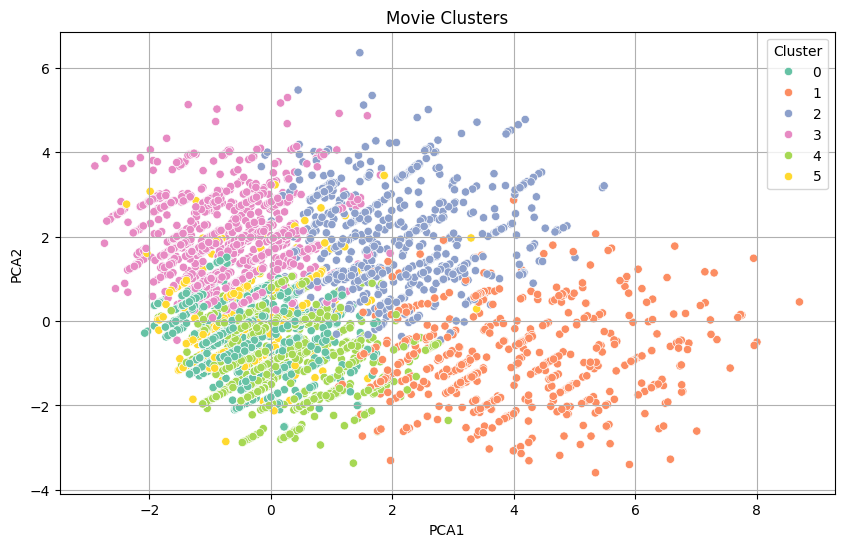

In [31]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_features, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Movie Clusters")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [33]:
#To show Example Titles per Cluster
for i in range(6):
    print(f"\n -> Sample movies in Cluster {i}:")
    titles = movie_features[movie_features['Cluster'] == i]['title'].head(5).to_list()
    for t in titles:
        print(" -", t)


 -> Sample movies in Cluster 0:
 - Sudden Death (1995)
 - Nixon (1995)
 - Casino (1995)
 - Sense and Sensibility (1995)
 - Powder (1995)

 -> Sample movies in Cluster 1:
 - Toy Story (1995)
 - Jumanji (1995)
 - Tom and Huck (1995)
 - Balto (1995)
 - Pocahontas (1995)

 -> Sample movies in Cluster 2:
 - GoldenEye (1995)
 - Cutthroat Island (1995)
 - City of Lost Children, The (Cité des enfants perdus, La) (1995)
 - Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
 - Mortal Kombat (1995)

 -> Sample movies in Cluster 3:
 - Heat (1995)
 - Money Train (1995)
 - Get Shorty (1995)
 - Copycat (1995)
 - Assassins (1995)

 -> Sample movies in Cluster 4:
 - Grumpier Old Men (1995)
 - Waiting to Exhale (1995)
 - Father of the Bride Part II (1995)
 - Sabrina (1995)
 - American President, The (1995)

 -> Sample movies in Cluster 5:
 - Richard III (1995)
 - Misérables, Les (1995)
 - Braveheart (1995)
 - Rob Roy (1995)
 - Beyond Rangoon (1995)


In [35]:
#I wanted to make every cluster for a specific genre but since it is unsupervised and K-Means groups based on overall similarity 
#in many features (e.g., rating, popularity, genre) so it cannot guarantee cluster boundaries based only on a specific column like genre.
#Also, many movies can have more than one genre, so I wrote a code to identify which cluster includes which dominatant genres.

In [37]:
#To get genre column names (excluding numeric features)
genre_columns = genres_expanded.columns  # from earlier step: genres = movies['genres'].str.get_dummies()
#To count genre frequency in each cluster
print("\n Genre distribution per cluster:")
for cluster in range(k):
    cluster_data = movie_features[movie_features['Cluster'] == cluster]
    genre_counts = cluster_data[genre_columns].sum().sort_values(ascending=False)
    top_genres = genre_counts.head(3).index.tolist()
    print(f"Cluster {cluster}: Top Genres → {', '.join(top_genres)}")


 Genre distribution per cluster:
Cluster 0: Top Genres → Drama, Romance, Documentary
Cluster 1: Top Genres → Children, Animation, Adventure
Cluster 2: Top Genres → Action, Adventure, Sci-Fi
Cluster 3: Top Genres → Thriller, Drama, Horror
Cluster 4: Top Genres → Comedy, Drama, Romance
Cluster 5: Top Genres → War, Drama, Action
Cluster 6: Top Genres → (no genres listed), Action, War
Cluster 7: Top Genres → (no genres listed), Action, War
Cluster 8: Top Genres → (no genres listed), Action, War
Cluster 9: Top Genres → (no genres listed), Action, War


In [39]:
#Splitting data by dominant genre
for genre in genre_columns:
    cluster_data = movie_features[movie_features[genre] == 1]
    print(f"\n-> Cluster for genre: {genre}")
    print(cluster_data['title'].head(5).to_list())



-> Cluster for genre: (no genres listed)
['Scorpio Rising (1964)', 'Doctor Who: The Time of the Doctor (2013)', 'Ben-hur (2016)', 'Beastie Boys: Sabotage (1994)', 'As We Were Dreaming (2015)']

-> Cluster for genre: Action
['Heat (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'Cutthroat Island (1995)', 'Money Train (1995)']

-> Cluster for genre: Adventure
['Toy Story (1995)', 'Jumanji (1995)', 'Tom and Huck (1995)', 'GoldenEye (1995)', 'Balto (1995)']

-> Cluster for genre: Animation
['Toy Story (1995)', 'Balto (1995)', 'Pocahontas (1995)', 'Goofy Movie, A (1995)', 'Gumby: The Movie (1995)']

-> Cluster for genre: Children
['Toy Story (1995)', 'Jumanji (1995)', 'Tom and Huck (1995)', 'Balto (1995)', 'Now and Then (1995)']

-> Cluster for genre: Comedy
['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Sabrina (1995)']

-> Cluster for genre: Crime
['Heat (1995)', 'Casino (1995)', 'Money Train (1995)', 'Get Shorty (19